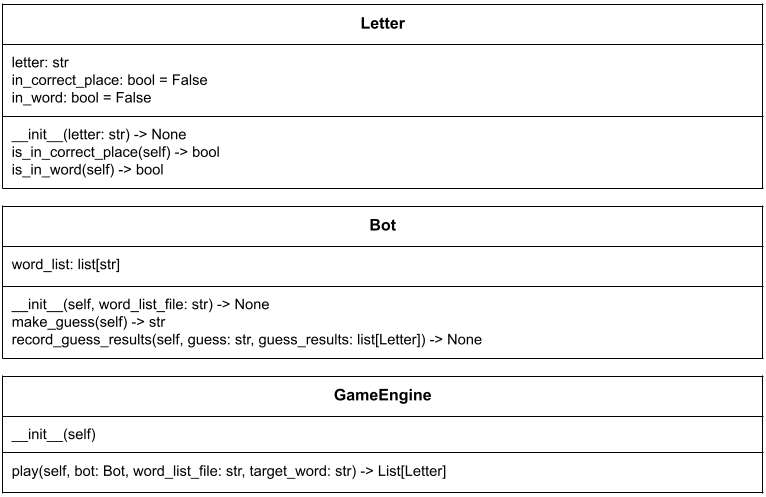# Assignment 1: Shall we play a game?

By using Object-Oriented Programming (OOP), you will create a program called _WordyPy_. In WordyPy, the bot you create
must try to guess a five-letter secret word based on feedback given from the game engine. For each word guess your bot
makes, the WordyPy game engine will give detailed feedback which your bot can use to increase its chances of winning.

## Requirements

The rules of WordyPy are as follows:

1. Each guess must be a five letter English word. Only the 26 letters of the English alphabet are used, and case does
   not matter.
2. The game engine, which is written for you, generates a hidden 5 letter word called the _target word_.
3. The bot, which you must write, attempts to guess that word. It will get up to six tries.
4. The bot will be given the location of a datafile which has a list of allowable words (one per line). Your bot must
   read in this datafile and only make guesses from this datafile.
5. After each guess the system provides feedback indicating if each character is in the correct position for the target
   word, and if not, if the character is in the target word but in the wrong position.
6. The bot must be "smart" in that once it has identified the correct location of a letter in a word it must only guess
   future words where that letter is in the same position.
7. We have written tests for these requirements; you must pass those tests to pass the assignment.

## Architecture

In order for your bot to play WordPy, you must implement two classes shown in the figure below (`Letter` and `Bot`) and
write the python logic for each method of the two classes.

![Architecture Diagram of WordyPy](architecture.png)

A `Letter` indicates a single English letter from a guess, and has methods and attributes to describe whether the letter
was in (or in the correct place) in the hidden target word.

The `Bot` class is your game playing agent! This class has two substantive methods in it:

1. `make_guess` which returns a string that is evaluated by the `GameEngine` and
2. `record_guess_results` which takes the evaluation done by the `GameEngine` in order to ensure that the same guess is
   never made twice **and** that your bot "learns" from previous guesses.

The `GameEngine`, given to you at the bottom of this notebook, will control the game play. You don't have to write the
`GameEngine` – we've done that for you. However, the `GameEngine` will not work until you have correctly defined the
`Letter` and `Bot` classess, including their methods. You will work on those!

## How to Test Your Bot

Once you have created the neccessary classes you should be able to test your bot by running this notebook. To verify it
is passing our grading criteria, press the validate button on the toolbar. Once you have verified this you can try
submitting to the autograder, which will evaluate our additional hidden unit tests and give you a grade -- don't worry,
you can submit to the autograder as many times as you would like!

You may wish to debug your `Bot` by playing a game with a shorter word list. We've included code for that at the bottom
of this notebook for testing, but be aware that it will not work until your `Letter` and `Bot` classes have been
implemented. Also, our final grader script will use a bigger dictionary of allowable words, so make sure you are
thinking more generally about the problem and not hard coding any example words into your work!

## Worked Example

Here is the output from an example run using the testing code provided. In this example five words were put into a text
file called temp_file.txt. The game engine randomly picked a target word of `DOGGY` and the bot made three guesses.

1. The first guess was the word `DRIVE` and the GameEngine provides the output of `D????` indicating that the first
   letter is in the word and is in the correct position and the last four letters are not in the word anywhere.
2. The bot then made the guess of `DADDY` and the GameEngine provides the output of `D?**Y` indicating that the first
   and the last letters are in the word and in the correct location, the second letter from `DADDY` is not in the word
   anywhere, and the third and fourth letters from `DADDY` are in the target word but not in those positions.
3. The final guess made by the bot is the word `DOGGY`, which the game engine identifies as correct and finishes
   **WordyPy**.

![Example of Playing WordyPy](example.png)


**Hint 1: Don't forget the Types!**

In the architecture diagram we have used the format that python uses for type annotations. For example, in the `Letter`
class, there are three methods. The constructor method, `__init__`, takes two input parameters, `letter`, which is of
type `string`, and `index`, which is of type `integer`. The `__init__` method returns `None`. The diagram also indicates
that the third attribute, `in_word`, is a boolean value and has a default value of `False` and you need to set this
value appropriately.

For a refresher on interpreting these type annotations, please consult [TODO: INCLUDE LINK TO COURSE 2 MATERIAL ON TYPE
HINTING HERE]


**Hint 2: Planning your Approach**

It can be a bit overwhelming to tackle the whole assignment at one time, so consider breaking it down into steps. The
steps I would take with this assignment would be:

1. Create the `Letter` class and ensure it passes all of the tests (both validation and assignment grading tests)
2. Create an initial `Bot` class based on the architecture diagram
3. Update the `Bot` class to make random guesses with the test words I provided
4. Update the `Bot` class to track the letters whose positions are identified correctly
5. Update the `Bot` class to track the letters which are not used at all and not use them in the next guesses. In short,
   ensure it keeps track of past guesses and makes a **"smart"** guess


**Hint 3: Considering an Algorithm for Smart Guesses**

One of the hardest parts of this assignment is making a "smart" guess. The assignment requires your bot to keep track of
what it has learned, and the `GameEngine` provides feedback to your bot using the `record_guess_results()` method. In
solving this part of the assignment consider the following:

1. You only need to keep track of which `Letter` objects have an `is_in_correct_place()` of `True`, so feel free to
   ignore other information about `Letter` objects such as whether `is_in_word()` is true
2. You don't need to keep track of all of your previous guesses if they are removed from your `word_list`
3. You may want to add additional attributes to your `Bot` which don't appear in the architecture diagram


In [3]:
# Create the implementation of the Letter class here


# YOUR CODE HERE
class Letter:
    def __init__(self, letter):
        self.letter = letter
        self.in_correct_place = False
        self.in_word = False
    def is_in_correct_place(self):
        return self.in_correct_place
    def is_in_word(self):
        return self.in_word

In [4]:
# This cell has the tests your Letter class should pass in order to
# be evaluated as correct. Some of the tests you can see here and
# try on your own (press the button labeled validate on the toolbar).
# Others are hidden from your view, and will be evaluated only when
# you submit to the autograder.

# Check if the Letter class exists
assert "Letter" in dir(), "The Letter class does not exist, did you define it?"

# Check to see if the Letter class can be created
l: Letter
try:
    l = Letter("s")
except:
    assert (
        False
    ), "Unable to create a Letter object with Letter('s'), did you correctly define the Letter class?"

# Check to see if the Letter class has the in_correct_place attribute
assert hasattr(
    l, "in_correct_place"
), "The letter object created has no in_correct_place attribute, but this should be False by default. Did you create this attribute?"


In [35]:
# Create the implementation of the Bot class here

# YOUR CODE HERE
class Bot:
    def __init__(self, word_list_file):
        self.word_list = []
        self.clues = []
        self.letters = []
        self.not_in_letters = []
        self.indexes = []
        with open(word_list_file, 'r') as file:
            for line in file.readlines():
                self.word_list.append(line.strip('\n').upper())           
        
    def make_guess(self):
        print(self.word_list)
        choice = ""
        guess_results = []
        
        while len(choice) == 0:
            choice = self.word_list.pop()
            if choice in self.clues:
                choice = ""
            else:
                if len(self.letters) > 0:
                    for l in self.letters:
                        if l not in choice:
                            choice = ""
                            break
                if len(choice) > 0 and len(self.not_in_letters) > 0:
                    for l in self.not_in_letters:
                        if l in choice:
                            choice = ""
                            break
                if len(choice) > 0 and len(self.indexes) > 0:
                    for (i, l) in self.indexes:
                        if choice[i] != l:
                            choice = ""
                            break
                        
        return choice
        
    def record_guess_results(self, guess, guess_results):
        #print('guess results', guess_results)
        #print(guess)
        clue = ""
        for index, l in enumerate(guess_results):
            clue += l.letter
            if l.is_in_word():
                print(l.letter, "is in word")
                if l.letter not in self.letters:
                    self.letters.append(l.letter)
            else:
                self.not_in_letters.append(l.letter)
            if l.is_in_correct_place():
                print(index, l.letter, "is in correct place")
                if (index, l.letter) not in self.indexes:
                    self.indexes.append((index, l.letter))
                    
        print('clue', clue)
        print('letters', self.letters)
        print('not in letter', self.not_in_letters)
        print('positions', self.indexes)
        self.clues.append(clue)
        

In [6]:
# Tests for Bot class.

# Check if the Bot class exists
assert "Bot" in dir(), "The Bot class does not exist, did you define it?"


In [7]:
import random


class GameEngine:
    """The GameEngine represents a new WordPy game to play."""

    def __init__(self):
        self.err_input = False
        self.err_guess = False
        self.prev_guesses = []  # record the previous guesses

    def play(
        self, bot, word_list_file: str = "words.txt", target_word: str = None
    ) -> None:
        """Plays a new game, using the supplied bot. By default the GameEngine
        will look in words.txt for the list of allowable words and choose one
        at random. Set the value of target_word to override this behavior and
        choose the word that must be guessed by the bot.
        """

        def format_results(results) -> str:
            """Small function to format the results into a string for quick
            review by caller.
            """
            response = ""
            for letter in results:
                if letter.is_in_correct_place():
                    response = response + letter.letter
                elif letter.is_in_word():
                    response = response + "*"
                else:
                    response = response + "?"
            return response

        def set_feedback(guess: str, target_word: str) -> tuple[bool, list[Letter]]:
            # whether the complete guess is correct
            # set it to True initially and then switch it to False if any letter doesn't match
            correct: bool = True

            letters = []
            for j in range(len(guess)):
                # create a new Letter object
                letter = Letter(guess[j])

                # check to see if this character is in the same position in the
                # guess and if so set the in_correct_place attribute
                if guess[j] == target_word[j]:
                    letter.in_correct_place = True
                    known_letters[j] = guess[j]  # record the known correct positions
                else:
                    # we know they don't have a perfect answer, so let's update
                    # our correct variable for feedback
                    correct = False

                # check to see if this character is anywhere in the word
                if guess[j] in target_word:
                    letter.in_word = True
                else:
                    unused_letters.add(guess[j])  # record the unused letters

                # add this letter to our list of letters
                letters.append(letter)

            return correct, letters

        # read in the dictionary of allowable words
        word_list: list(str) = list(
            map(lambda x: x.strip().upper(), open(word_list_file, "r").readlines())
        )
        # record the known correct positions
        known_letters: list(str) = [None, None, None, None, None]
        # set of unused letters
        unused_letters = set()

        # assign the target word to a member variable for use later
        if target_word is None:
            target_word = random.choice(word_list).upper()
        else:
            target_word = target_word.upper()
            if target_word not in word_list:
                print(f"Target word {target_word} must be from the word list")
                self.err_input = True
                return

        print(
            f"Playing a game of WordyPy using the word list file of {word_list_file}.\nThe target word for this round is {target_word}\n"
        )

        MAX_GUESSES = 6
        for i in range(1, MAX_GUESSES):
            # ask the bot for it's guess and evaluate
            guess: str = bot.make_guess()

            # print out a line indicating what the guess was
            print(f"Evaluating bot guess of {guess}")

            if guess not in word_list:
                print(f"Guessed word {guess} must be from the word list")
                self.err_guess = True
            elif guess in self.prev_guesses:
                print(f"Guess word cannot be the same one as previously used!")
                self.err_guess = True

            if self.err_guess:
                return

            self.prev_guesses.append(guess)  # record the previous guess

            for j, letter in enumerate(guess):
                if letter in unused_letters:
                    print(
                        f"The bot's guess used {letter} which was previously identified as not used!"
                    )
                    self.err_guess = True
                if known_letters[j] is not None:
                    if letter != known_letters[j]:
                        print(
                            f"Previously identified {known_letters[j]} in the correct position is not used at position {j}!"
                        )
                        self.err_guess = True

                if self.err_guess:
                    return

            # get the results of the guess
            correct, results = set_feedback(guess, target_word)

            # print out a line indicating whether the guess was correct or not
            print(f"Was this guess correct? {correct}")

            print(f"Sending guess results to bot {format_results(results)}\n")

            bot.record_guess_results(guess, results)

            # if they got it correct we can just end
            if correct:
                print(f"Great job, you found the target word in {i} guesses!")
                return

        # if we get here, the bot didn't guess the word
        print(
            f"Thanks for playing! You didn't find the target word in the number of guesses allowed."
        )
        return

In [36]:
if __name__ == "__main__":
    # Chris's favorite words
    favorite_words = ["doggy", "drive", "daddy", "field", "state"]

    # Write this to a temporary file
    words_file = "temp_file.txt"
    with open(words_file, "w") as file:
        file.writelines("\n".join(favorite_words))

    # Initialize the student Bot
    bot = Bot(words_file)

    # Create a new GameEngine and play a game with the Bot, in this
    # test run I chose to set the target_word to "doggy"
    GameEngine().play(bot, word_list_file=words_file, target_word="doggy")

Playing a game of WordyPy using the word list file of temp_file.txt.
The target word for this round is DOGGY

['DOGGY', 'DRIVE', 'DADDY', 'FIELD', 'STATE']
Evaluating bot guess of STATE
Was this guess correct? False
Sending guess results to bot ?????

clue STATE
letters []
not in letter ['S', 'T', 'A', 'T', 'E']
positions []
['DOGGY', 'DRIVE', 'DADDY', 'FIELD']
Evaluating bot guess of DOGGY
Was this guess correct? True
Sending guess results to bot DOGGY

D is in word
0 D is in correct place
O is in word
1 O is in correct place
G is in word
2 G is in correct place
G is in word
3 G is in correct place
Y is in word
4 Y is in correct place
clue DOGGY
letters ['D', 'O', 'G', 'Y']
not in letter ['S', 'T', 'A', 'T', 'E']
positions [(0, 'D'), (1, 'O'), (2, 'G'), (3, 'G'), (4, 'Y')]
Great job, you found the target word in 2 guesses!
